<a href="https://colab.research.google.com/github/arzi67/RecycleMates/blob/main/RM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.image as mpimg
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array, smart_resize
import seaborn as sns

import cv2
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd '/content/drive/MyDrive/Colab Notebooks'

/content/drive/MyDrive/Colab Notebooks


# 1. Importing the dataset

In [ ]:
from pathlib import Path
p = Path().cwd()
p

PosixPath('/content/drive/MyDrive/Colab Notebooks')

In [ ]:
target_dict = {'can': 0,
               'cardboard': 1,
               'glass bottle': 2,
               'plastic bottle': 3} # create dictionary mapping you data classes/labels to integer labels


# Importing the data
images1 = np.load(p/"images.npy")
labels1 = np.load(p/"labels.npy")
print(images1.shape)
print(labels1.shape)

(5520, 128, 128, 3)
(5520,)


# 2. Exploring the data

In [ ]:
labels_int = [target_dict.get(e, e) for e in labels1] # use the target_dict to convert the string labels to an array of integers
labels_int = np.array(labels_int) # convert the list of int labels to a NumPy array

In [ ]:
unique, counts = np.unique(labels_int, return_counts=True)
dict(zip(unique, counts))

{0: 1414, 1: 1021, 2: 1448, 3: 1637}

<Axes: xlabel='Object', ylabel='count'>

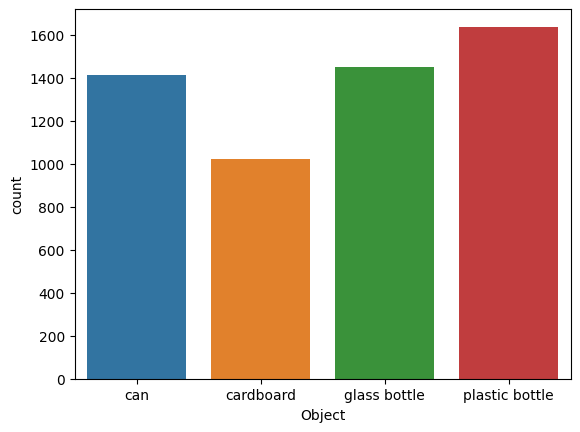

In [ ]:
objects = pd.DataFrame(labels1, columns=['Object'])
sns.countplot(x=objects["Object"])

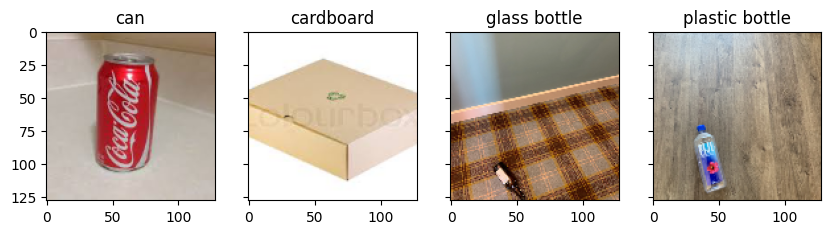

In [ ]:
import random

can_i = random_number = random.randint(1, 1414)
cardboard_i = random_number = random.randint(1415, 1414+1021)
glassbottle_i = random_number = random.randint(1414+1021, 1414+1021+1448)
plasticbottle_i = random_number = random.randint(1414+1021+1448, 1414+1021+1448+1637)

f, axarr = plt.subplots(1, 4, sharey=True, figsize=(10, 10))
axarr[0].set_title(labels1[can_i])
axarr[0].imshow(images1[can_i]/255)
axarr[1].set_title(labels1[cardboard_i])
axarr[1].imshow(images1[cardboard_i]/255)
axarr[2].set_title(labels1[glassbottle_i])
axarr[2].imshow(images1[glassbottle_i]/255)
axarr[3].set_title(labels1[plasticbottle_i])
axarr[3].imshow(images1[plasticbottle_i]/255)

# 3. Creating the models

In [ ]:
images1 = np.reshape(images1, (images1.shape[0], -1))

In [ ]:
from sklearn.model_selection import train_test_split
# 70% for training, 20% for validation, and 10% for testing
X_train, X_test, y_train, y_test = train_test_split(images1, labels_int, test_size=0.1, random_state=42)

In [ ]:
X_train.shape

(4968, 49152)

In [ ]:
## Shuffle the dataset
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [ ]:
# Normalizing the data and reshaping
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
# Shape of the training dataset
X_train.shape

(4968, 49152)

In [ ]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, MaxPool2D
from tensorflow.keras import optimizers
from tensorflow.keras import losses

y_train = to_categorical(y_train, dtype="int")
y_test = to_categorical(y_test, dtype="int")

In [ ]:
image_shape = X_train[0].shape
image_shape

(49152,)

In [ ]:
# Required libraries
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [ ]:
rf_classifier = RandomForestClassifier(
    n_estimators=200,  # Number of trees in the forest
    criterion='gini',  # Split criterion (other option: 'entropy')
    max_depth=10,  # Maximum depth of each tree
    min_samples_split=5,  # Minimum number of samples required to split an internal node
    min_samples_leaf=1,  # Minimum number of samples required to be at a leaf node
    max_features='sqrt',  # Number of features to consider when looking for the best split
    random_state=42
)

In [ ]:
# Training the classifier
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_split=5, n_estimators=200,
                       random_state=42)

In [ ]:
# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

              precision    recall  f1-score   support

           0       0.96      0.14      0.25       153
           1       0.84      0.54      0.66        89
           2       0.83      0.28      0.41       138
           3       0.85      0.62      0.72       172

   micro avg       0.85      0.39      0.53       552
   macro avg       0.87      0.40      0.51       552
weighted avg       0.87      0.39      0.50       552
 samples avg       0.39      0.39      0.39       552

Accuracy: 0.3894927536231884


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
